<a href="https://colab.research.google.com/github/NayloEze/Data-Types-List-and-Sets/blob/main/KADATEMY_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KADATEMY PROJECT ON ACQUISITIONS BY VARIOUS PARENT COMPANIES.

By Faith, Chioma and Chinelo.

 Dataset was obtained via Kaggle. Objective of this project was to clean and analyze the provided dataset and inturn see what information and trends that can be deduced from it.

 First thing that stood out from this Dataset was the fact that it was mainly filed with object datatype (string), thereby being our first limitation in analysing this data.

 Second observation was that in checking for missing values, we initially had zeros which implied that there was no missing data, but looking at the raw data clearly showed that a lot of cells were missing data.They only appeared as filled because it has "-" contained in it.  To tackle this, we initially replaced with NaN. 

 We changed the "Business" column to "Industry" as it better explains the what category the values contained belong to

 Next steps was dropping columns, we uanimously dropped - ID, Category and Derived Products because it would not impact our data or answer the questions we intended to ask. 

The other things we did to finalize the cleaning was filling the empty cells for Country and Industry with thier mode. The next column we needed to address was "Acquisition Price" and the best course of action was to delete the cells with NaN which automatically means deleting rows. This was a fair decision as the empty columns seemed evenly spread across the "Parent Company" when we scanned the raw data. In essence, we can say, the dataframe we worked with was selected sample size.

At this point, our Data Cleaning is complete. Next Steps is Visualization. See charts and interpretation below 

In [ ]:
#Importing relevant libraries 
import numpy as np      #------- used for numerical operations
import pandas as pd     # ------ used for data preprocessing
import matplotlib.pyplot as plt  #---------- used for data visualization
import seaborn as sns   #------------ also used for data visualisation

In [86]:
#uploading the data for analysis
from google.colab import files
uploaded = files.upload()

Saving acquisitions.csv to acquisitions (1).csv


In [ ]:
#reading data into pandas dataframe and checking first 10 rows
df_acquisition = pd.read_csv("/content/acquisitions.csv")
df_acquisition.head()

,ID,Parent Company,Acquisition Year,Acquisition Month,Acquired Company,Business,Country,Acquisition Price,Category,Derived Products
0,1,Apple,1988,Mar,Network Innovations,Software,-,-,-,-
1,2,Apple,1988,Jun,Orion Network Systems,Computer Software,-,-,-,-
2,3,Apple,1988,Jun,Styleware,Computer software,-,-,-,-
3,4,Apple,1988,Jul,Nashoba Systems,Computer software,-,-,-,-
4,5,Apple,1989,Jan,Coral Software,Computer software,-,-,-,-


In [ ]:
#check the shape of the data 
df_acquisition.shape

(1455, 10)

In [ ]:
#check the information (characteristics of the dataset)
df_acquisition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455 entries, 0 to 1454
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 1455 non-null   int64 
 1   Parent Company     1455 non-null   object
 2   Acquisition Year   1455 non-null   object
 3   Acquisition Month  1455 non-null   object
 4   Acquired Company   1455 non-null   object
 5   Business           1455 non-null   object
 6   Country            1455 non-null   object
 7   Acquisition Price  1455 non-null   object
 8   Category           1455 non-null   object
 9   Derived Products   1455 non-null   object
dtypes: int64(1), object(9)
memory usage: 113.8+ KB


In [ ]:
#check for missing values 
df_acquisition.isnull().sum()

ID                   0
Parent Company       0
Acquisition Year     0
Acquisition Month    0
Acquired Company     0
Business             0
Country              0
Acquisition Price    0
Category             0
Derived Products     0
dtype: int64

In [ ]:
#check data type of the columns
df_acquisition.dtypes

ID                    int64
Parent Company       object
Acquisition Year     object
Acquisition Month    object
Acquired Company     object
Business             object
Country              object
Acquisition Price    object
Category             object
Derived Products     object
dtype: object

In [ ]:
#copy dataframe
df2_acqusition = df_acquisition.copy()
df2_acqusition.head()


,ID,Parent Company,Acquisition Year,Acquisition Month,Acquired Company,Business,Country,Acquisition Price,Category,Derived Products
0,1,Apple,1988,Mar,Network Innovations,Software,-,-,-,-
1,2,Apple,1988,Jun,Orion Network Systems,Computer Software,-,-,-,-
2,3,Apple,1988,Jun,Styleware,Computer software,-,-,-,-
3,4,Apple,1988,Jul,Nashoba Systems,Computer software,-,-,-,-
4,5,Apple,1989,Jan,Coral Software,Computer software,-,-,-,-


In [ ]:
df_acquisition = df_acquisition.rename(columns = {"Business": "Industry"})

In [ ]:
#Replacing string values in Acquisition Price with NaN
df_acquisition["Acquisition Price"] = df_acquisition["Acquisition Price"].replace("-",np.nan)
df_acquisition["Acquisition Price"] = df_acquisition["Acquisition Price"].replace("undisclosed",np.nan)
df_acquisition.head(10)

,Parent Company,Acquisition Year,Acquisition Month,Acquired Company,Industry,Country,Acquisition Price
5,Apple,1997,Feb,NeXT,Unix-like hardware and software platform,United States,404000000.0
6,Apple,1997,Sep,Power Computing Corporation,Macintosh clones,United States,110000000.0
7,Apple,1999,Jan,Xemplar Education,Software,United States,4926000.0
8,Apple,1999,Nov,Raycer Graphics,Computer graphic chips,United States,15000000.0
14,Apple,2001,Jul,Spruce Technologies,Graphics software,United States,14900000.0
15,Apple,2001,Dec,PowerSchool,Online info systems services,United States,66100000.0
16,Apple,2002,Feb,Nothing Real,Special effects software,United States,15000000.0
17,Apple,2002,Apr,Zayante,FireWire chips and software,United States,13000000.0
18,Apple,2002,Jun,Silicon Grail Corp-Chalice,Digital effects software,United States,20000000.0
20,Apple,2002,Jun,Prismo Graphics,Special-effects titling software for film and ...,United States,20000000.0


In [ ]:
#Changing the data type for Acqusition Price
df_acquisition["Acquisition Price"] = df_acquisition["Acquisition Price"].astype("float")
df_acquisition.dtypes


Parent Company        object
Acquisition Year      object
Acquisition Month     object
Acquired Company      object
Industry              object
Country               object
Acquisition Price    float64
dtype: object

In [ ]:
df_acquisition.isnull().sum()

In [ ]:
df_acquisition[df_acquisition.eq("-").any(1)]

In [ ]:
df_acquisition = df_acquisition.replace("-",np.nan)
df_acquisition.head()

In [ ]:
df_acquisition.isnull().sum()

In [85]:
df_acquisition.describe()

,Acquisition Price
count,3.730000e+02
mean,1.377967e+09
std,5.597007e+09
min,2.000000e+05
25%,4.750000e+07
50%,1.500000e+08
75%,5.450000e+08
max,7.130000e+10


In [ ]:
#replacing NaN with the mode values of Country and Business
df_acquisition["Country"].fillna(df_acquisition["Country"].mode()[0], inplace = True)
df_acquisition["Industry"].fillna(df_acquisition["Industry"].mode()[0], inplace = True)
df_acquisition.head()

,Parent Company,Acquisition Year,Acquisition Month,Acquired Company,Industry,Country,Acquisition Price
5,Apple,1997,Feb,NeXT,Unix-like hardware and software platform,United States,404000000.0
6,Apple,1997,Sep,Power Computing Corporation,Macintosh clones,United States,110000000.0
7,Apple,1999,Jan,Xemplar Education,Software,United States,4926000.0
8,Apple,1999,Nov,Raycer Graphics,Computer graphic chips,United States,15000000.0
14,Apple,2001,Jul,Spruce Technologies,Graphics software,United States,14900000.0


In [ ]:
#Dropping Columns - ID, Category and Group
#df_acquisition = df_acquisition.drop(columns=["ID","Category","Derived Products"])


In [ ]:
#dropping all NaN values
df_acquisition.dropna(inplace = True)
df_acquisition.head()

,Parent Company,Acquisition Year,Acquisition Month,Acquired Company,Industry,Country,Acquisition Price
5,Apple,1997,Feb,NeXT,Unix-like hardware and software platform,United States,404000000.0
6,Apple,1997,Sep,Power Computing Corporation,Macintosh clones,United States,110000000.0
7,Apple,1999,Jan,Xemplar Education,Software,United States,4926000.0
8,Apple,1999,Nov,Raycer Graphics,Computer graphic chips,United States,15000000.0
14,Apple,2001,Jul,Spruce Technologies,Graphics software,United States,14900000.0


In [ ]:
#new shape of dataframe after dropping NaN values
df_acquisition.shape

(373, 7)

In [ ]:
assert sum(df_acquisition.isnull().sum()==0),"There are still null values"

DATA VISUALIZATION STARTS HERE

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


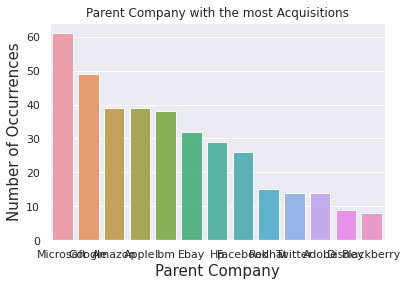

In [ ]:
# Show the Parent Company with most Acquisitions over the years 

acquired_company_count = df_acquisition['Parent Company'].value_counts()
sns.set(style="darkgrid")
sns.barplot(acquired_company_count.index, acquired_company_count.values, alpha=0.9);
plt.title('Parent Company with the most Acquisitions')
plt.xlabel('Number of Occurrences', fontsize=15)
plt.ylabel('Parent Company', fontsize=15)
plt.show()

Though not clearly shown mainly because of the number of variable being plotted, we can deduce that Microsoft has had the most number of Acqusitions over the years and Blackberry has had the least.

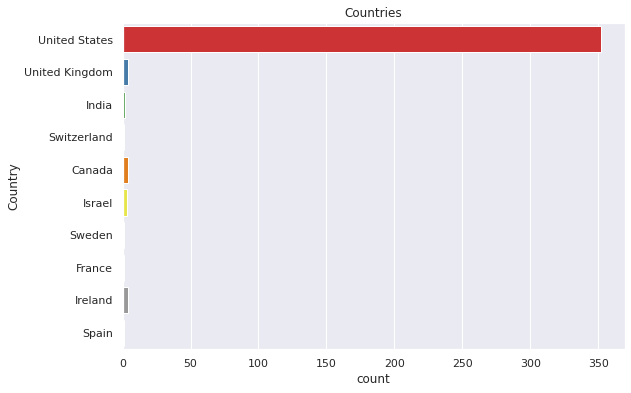

In [ ]:
#show countries where the most acquisitions have occured.
fig = plt.figure(figsize=(9,6))
plt.title("Countries")
sns.countplot(data = df_acquisition, y = "Country", palette="Set1")

Here, we wanted to find out what country has had the most acqusitions i.e. which country has had its companies acquired by the Parent companies listed in the Dataframe. The graph very clearly answers it - the United States. in comparison to the rest of the countries. the margin is quite high.

This could pose further questions like:
-Does the US have more companies of interest compared to the other listed countries
- Are there opportunities in other countries for the listed Parent Companies to acquire
- or are they not just interested in selling thier business.

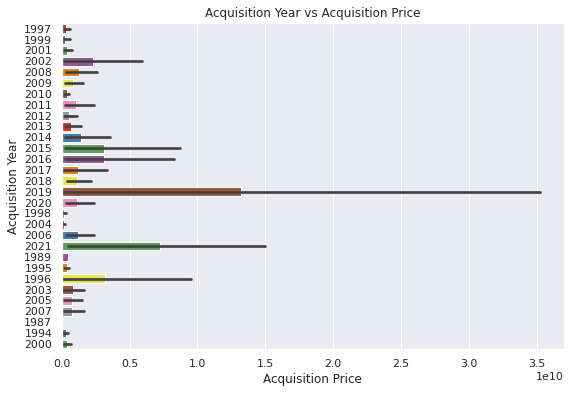

In [ ]:
#show dollar spend in each year
fig = plt.figure(figsize=(9,6))
plt.title("Acquisition Year vs Acquisition Price")
sns.barplot(data = df_acquisition,x = "Acquisition Price", y = "Acquisition Year", palette="Set1")

The goal here was to look at the total amount of dollar spend in each year and we can see thet 2019 had the highest total amount of dollar spent on acqusition.

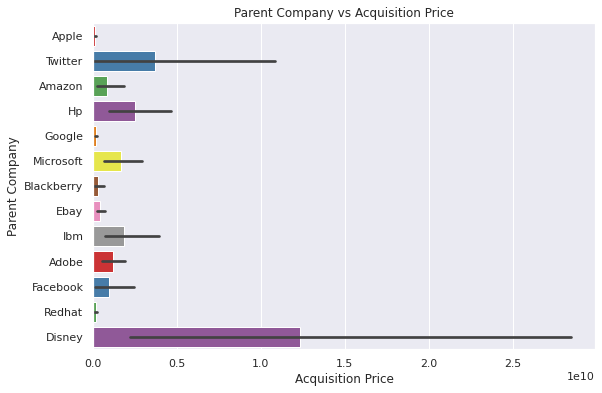

In [ ]:
#plotting Parent Company against Acquisition price to show how much each company has spent in acquisitions 
fig = plt.figure(figsize=(9,6))
plt.title("Parent Company vs Acquisition Price")
sns.barplot(data = df_acquisition,x = "Acquisition Price", y = "Parent Company", palette="Set1")

Here, we wanted to find what Parent Company had spent the most in acquisition. The result was Disney, which was quite interesting as in the fisrt chart above, Microsoft was determined to have had the most Acquisitions. This could mean that Microsoft spend less to acquire more.
One can imply that Microsoft probably have better negotiating skills or that most compnays are willing to be acquired by them as a result of thier history or goodwill.

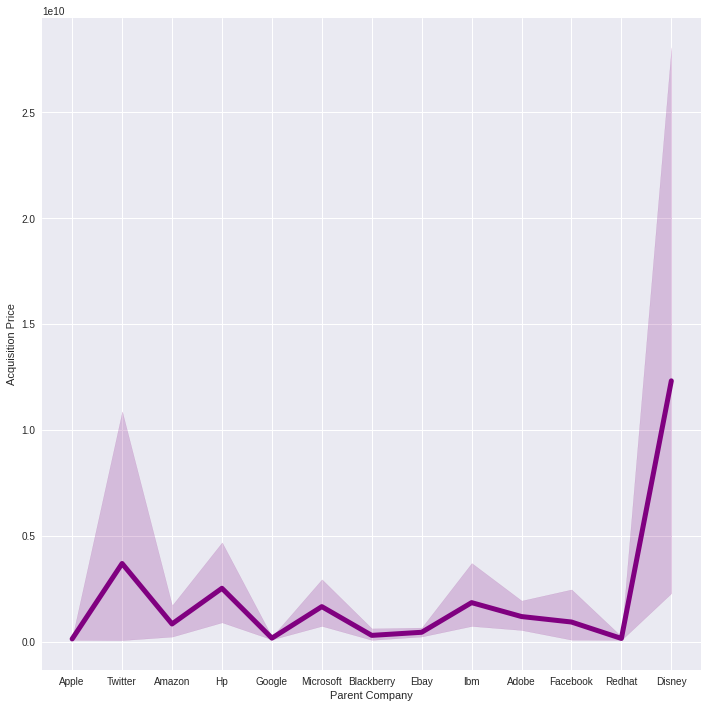

In [84]:
#This is to depict the highest price and the highest parent company
plt.style.use('seaborn')
sns.relplot(data=df_acquisition[['Acquisition Price','Parent Company']], y='Acquisition Price', x='Parent Company', kind='line', height=10, linewidth=5, color='purple')
plt.show()

Using replot, we plotted Parent Company againt Acqusition price and it reflects the same answers as potrayed in the Barplot above. Disney as the highest spender and the group of  Apple, Google , Blackberry, Redhat as the least spenders

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self._figure.tight_layout(*args, **kwargs)


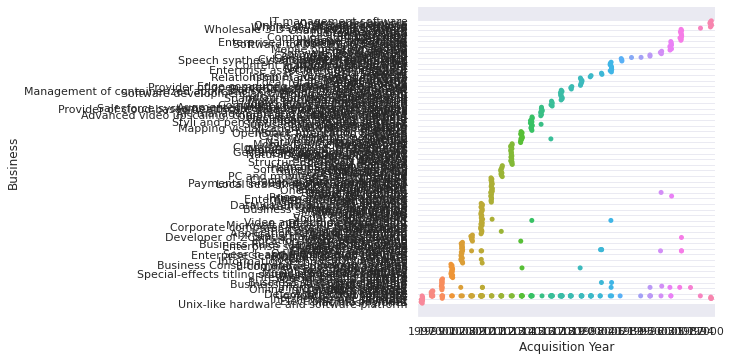

In [ ]:
sns.catplot(x="Acquisition Year", y="Business", data = df_acquisition)

The goal of this was to show how many acqusitions within industries in a single year. Due to the number of variables we have , it is almost impossible to interpret and will like the advise of the teachers :)